The great variety of examples makes the book *Introduction to Probability Models* by Sheldon M. Ross, in my opinion, the best of its kind. Many examples I found to be highly fascinating, being both mathematically interesting and inspired by real life.

They would often come with some clever mathematical trick --- almost too clever, one might say; for on some occasions the arguments threw me off-guard so much that I had trouble believing it: I needed to see it with my own eyes first. I found it helpful, therefore, to be able to toy around with the models myself. In the hope that it may be of similar help to others, I've bundled the examples together into this notebook.

I have collected examples from throughout the book, though with emphasis on Sections 3--8, progressing linearly, so that you will find that the examples become more advanced as the notebook progresses. As the book is written for mathematicians and not computer scientists, I have always chosen simplicity over efficiency in my code.

Progress: Sections 1--5 are mostly completed.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

##Section 1

**Example 1.14 (False positive paradox).** A laboratory blood test is $95$ percent effective in detecting a certain disease when it is, in fact, present. However, the test also yields a 'false positive' result for $1$ percent of the healthy persons tested.  If $0.5$ percent of the population actually has the disease, what is the probability a person has the disease given that his test result is positive?

*Solution:* A straightforward application of Bayes' formula yields a probability of $95 / 294$, which is approximately $0.32$. Given the high accuracy of the blood test, this may feel like an unintuitively low number. Let's confirm our result numerically, by considering a population of $100\,000$ people, of which $500$ have the disease.

In [ ]:
population = ["Infected"] * 500 + ["Healthy"] * 99500

outcomes = {"True positive": 0,
            "False negative": 0,
            "False positive": 0,
            "True negative": 0}

for person in population:
  if person == "Infected":
    blood_test = np.random.choice(["True positive", "False negative"], p = [0.95, 0.05])
    outcomes[blood_test] += 1
  if person == "Healthy":
    blood_test = np.random.choice(["False positive", "True negative"], p = [0.01, 0.99])
    outcomes[blood_test] += 1

print("A person with positive result has the disease with probability", 
      outcomes["True positive"] / (outcomes["True positive"] + outcomes["False positive"]))

A person with positive result has the disease with probability 0.324585635359116


##Section 2

**Example 2.53.** Consider a particle moving along a set of $m + 1$ nodes, labelled $0,1,\ldots,m$, that are arranged around a circle. Starting at position $i = 0$, at each step, the particle is equally likely to move one position in either the clockwise or the counterclockwise direction. What is the probability that node $i$ (for $i = 1,\ldots,m$) is the last one to be visited?

*Solution:* Perhaps it feels intuitive to you that the nodes around $m / 2$ will be more likely to be visited last. Numerical simulations suggest a different story, however:

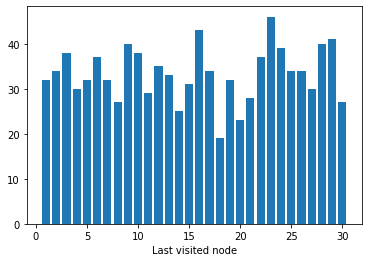

In [ ]:
m = 30
iterations = 1000

nodes = [i for i in range(m + 1)]

final_nodes = {i : 0 for i in range(1, m + 1)}

for _ in range(iterations):
  unvisited_nodes = [i for i in range(1, m + 1)]

  position = 0
  while len(unvisited_nodes) > 1:
    step = np.random.choice([-1, 1])
    position += step
    position = position % (m + 1)
    if position in unvisited_nodes:
      unvisited_nodes.remove(position)

  final_nodes[unvisited_nodes[0]] += 1

output = list(final_nodes.values())

plt.bar(range(1, m + 1), output)
plt.xlabel("Last visited node")
plt.show()

It appears that our data does not exhibit any nontrivial pattern. And indeed it turns out that every node is equally likely to be visited last. A standard recurrence relation argument should convince you of this.

##Section 3

**Example 3.23 (Secretary problem).** We are to be presented with $n$ distinct prizes in sequence. After being presented with a prize, we must decide whether to accept it or reject it and consider the next prize. The only information we know about the prize is the relative rank of that prize compared to the ones already seen. Assuming that all $n!$ orderings of the prizes are equally likely, with what strategy can we maximise the probability of obtaining the best prize?

*Solution:* We consider the following rudimentary strategy. Fix a factor $\alpha$ between $0$ and $100$. We let the first $\alpha \%$ of the prizes go by, and then we select the first prize to appear that is better than all of those --- provided one appears. What $\alpha$ would be the optimal choice?

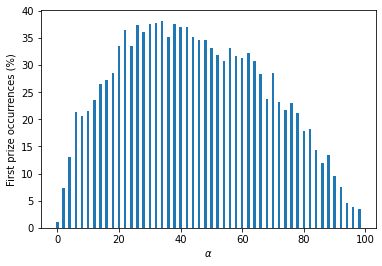

In [ ]:
n = 100
alpha_range = np.arange(0, 100, 2)
iterations = 500 #Number of iterations for *every* alpha in the specified range.

data = []

for alpha in alpha_range:
  alpha = alpha / 100
  choices = [] #Outcomes of the strategy after each run
  for _ in range(iterations):
    prizes = np.random.permutation(range(1, n + 1))
    for i in range(math.floor(alpha * n), n):
      if all(prizes[i] < prizes[j] for j in range(math.floor(alpha * n))):
        choices.append(prizes[i])
        break
      if i == n - 1: #If we're through the list and we found no desirable prize, we just go with the last one
        choices.append(prizes[i])
  first_prizes = choices.count(1) / iterations
  data.append(100 * first_prizes)

plt.bar(alpha_range, data)
plt.xlabel(r'$\alpha$')
plt.ylabel('First prize occurrences (%)')
plt.show()

We observe a peak in our performance around $\alpha = 34\%$, with a corresponding success rate of around $38\%$ --- a strikingly good result. What's more, although we have performed the experiment for $n = 100$, one finds similar results upon varying $n$. Why is this the case?

Let's say that we reject the first $k$ prizes and then accept the best one we encounter. Then we're asking what the probability $P_{n,k}(B)$ is of getting the very best prize. To compute this, we condition on the position $X$ of the best prize.

$$\begin{split}
P_{n,k}(B) &= \sum_{i=1}^n P(X = i) \cdot P_{n,k}(B \mid X = i) \\ 
  &= \frac{1}{n} \sum_{i=1}^n P(X = i) \cdot P_{n,k}(B \mid X = i)\text{.}
  \end{split}$$

Clearly, $P_{n,k}(B \mid X = i)$ will be $0$ if $i \leq k$. In contrast, if $i > k$, then the prizes $k+1,\ldots,i-1$ shouldn't be better than the first $k$ prizes; in other words, of the first $i - 1$ prizes, the best should be among the first $k$, and this happens with probability $k / (i-1)$. We thus find that

$$\begin{split}
P_{n,k}(B) &= \frac{k}{n} \sum_{i = k + 1}^{n} \frac{1}{i - 1} \\
&\approx \frac{k}{n} \log \frac{n}{k} \text{.}\end{split}$$

If we keep $n$ fixed, and we pretend $k$ as a real variable, then the approximation is observed to exhibit a maximum at $k = n / e$. As $1 / e \approx 0.37$, this matches up with our observations.

**Example 3.24 (Rencontre numbers).** At a party $n$ men take off their hats. The hats are then mixed up and each man randomly selects one. What is the probability that exactly $k$ men select their own hat?

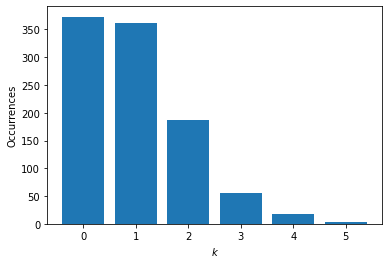

In [ ]:
n = 1000
iterations = 1000

data = []

for _ in range(iterations):
  #We can simulate the problem by considering a random permutation of range(n). A match occurs if the k-th element happens to be k.
  matches = 0
  random_hats = np.random.permutation(range(n))
  for i in range(n):
    if random_hats[i] == i:
      matches += 1
  data.append(matches)

limit = math.floor(math.log(n)) #Heuristically determined reasonable upper bound for our graph.

output = [data.count(i) for i in range(limit)]

plt.bar(range(limit), output)
plt.xlabel(r"$k$")
plt.ylabel("Occurrences")
plt.xticks(range(limit))
plt.show()

Observe that we rarely see a large number of matches; in fact, this appears to remain the case if we significantly increase or decrease $n$. Let's consider the mathematics.

Denote by $E_n$ the event that $k = 0$. Our first goal will be to determine $P(E_n)$. To do so, we condition on whether or not the first man selects his own hat --- call these events $M$ and $M^c$. Then

$$P(E_n) = P(M) P(E_n \mid M) + P(M^c) P(E_n \mid M^c) \text{.}$$

Evidently, $P(E_n \mid M) = 0$, and so

$$P(E_n) = \frac{n-1}{n} \cdot P(E_n \mid M^c)\text{.}$$

But what is $E_n \mid M^c$? The situation is now as follows: We have $n - 1$ men and $n - 1$ hats, but now there is one man witout a matching hat, and one hat without a matching man. We now condition further on whether the unmatched man picks the unmatched hat to obtain

$$P(E_n \mid M^c) = \frac{1}{n - 1} P(E_{n - 2}) + \frac{n - 2}{n - 1}P(E_{n-1} \mid M^c)$$

Using this, we deduce the recurrence relation

$$P(E_n) = \frac{n-1}{n} P(E_{n-1}) + \frac{1}{n} P(E_{n-2})\text{.}$$

Starting from $P(E_1) = 0$ and $P(E_2) = 1/2$, we easily find inductively that 

$$P(E_n) = \sum_{i = 2}^{n} (-1)^i \frac{1}{i!}\text{.}$$

Now, to obtain the probability of exactly $k$ matches, we may consider any fixed group of $k$ men, and ask for the probability that they, and only they, select their own hats. This probability is 

$$\frac{1}{n} \frac{1}{n-1} \cdots \frac{1}{n - (k - 1)} P(E_{n-k}) = \frac{(n-k)!}{n!} P_{n-k}\text{,}$$

since $P(E_{n-k})$ represents the probability that the other $n - k$, selecting among their own hats, exhibit no matches. Since there are ${{n} \choose {k}}$ choices of such a set of $k$ men, the probability of exactly $k$ matches must be 

$$ {{n} \choose {k}} \cdot \frac{(n-k)!}{n!} P_{n-k} = \frac{1}{k!} \sum_{i = 2}^{n - k} (-1)^i \frac{1}{i!}\text{,}$$

which, for large $n$, is approximately $e^{-1} / k!$. This is consistent with our numerical results.

The number of permutations of a size-$n$ set with exactly $k$ fixed points is sometimes known as the $(n,k)$-th rencontre numbers, denoted $D_{n,k}$. Using the analysis outlined above, one can give a recursive formula for the $D_{n,k}$.

**Section 3.6.3 (Bose--Einstein statistics).** If $n$ independent trials are performed, each of which is a success with probability $p$, then the total number $X$ of successes is a random variable afforded by a binomial distribution. But what if the value of $p$ is not predetermined but is chosen according to a distribution $f$ on $[0,1]$? Then

$$P(X = k) = \int_0^1 P(X = k \mid p = t) f(t) \,dt\text{.}$$

If we take $f$ to be a uniform distribution, then

$$P(X = k) = \int_0^1 {{n}\choose{k}} p^k(1-p)^{n-k}\,dp = \frac{1}{n+1}\text{,}$$

so that each of the $n + 1$ values of $X$ are equally likely.

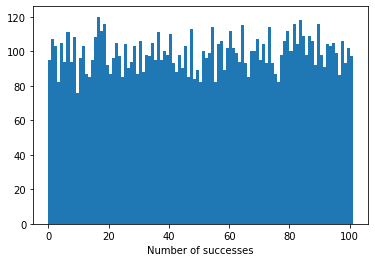

In [ ]:
#Editable parameters
iterations = 10000
n = 100

data = []

for _ in range(iterations):
  p = np.random.rand()
  successes = 0
  for i in range(n):
    c = np.random.rand()
    if c < p:
      successes += 1
  data.append(successes)

plt.hist(data, bins = range(n + 2))
plt.xlabel("Number of successes")
plt.show()

Now let's consider the case where each trial has more than two possible outcomes. Every trial has one of $m$ possible outcomes, occurring with probabilities $p_1,\ldots,p_m$. If we know the $p_i$, then the vector $(X_1,\ldots,X_m)$ follows a multinomial distribution. But now suppose that the probability vector $(p_1,\ldots,p_m)$ is not specified but is chosen from a uniform distribution on the $(m-1)$-sphere. Then one can show that

$$ P(X_1 = x_1,\ldots,X_m = x_m) = {{n + m - 1}\choose{m-1}}^{-1}\text{,} $$

meaning that every possible outcome is equally likely. This probability distribution is sometimes called the Bose--Einstein distribution. In physics, it describes how noninteracting particles may occupy a set of available discrete energy states. That these adhere to such a uniform distribution rather than a multinomial one is a reflection of the quantum-mechanical fact that particles can be indistinguishable, even in principle.

##Section 4

**Example 4.8 (Chapman--Kolmogorov equations).** Suppose that the chance of rain tomorrow only depends on whether or not it's raining today. If it rains today, then it will rain tomorrow with probability $0.7$, and if it does not rain today, then it will rain tomorrow with probability $0.4$. Then the weather may be seen as a two-state Markov chain with transition probability matrix

$$P = \begin{pmatrix} 0.7 & 0.3 \\ 0.4 & 0.6 \end{pmatrix}$$

Suppose that it's raining today. What is the probability that it will be raining four days from now?

In [ ]:
iterations = 10000

rain_count = 0
for _ in range(iterations):
  rain_today = True
  for days in range(1, 4):
    p = np.random.rand()
    if rain_today and p <= 0.7:
      rain_tomorrow = True
    elif rain_today and p > 0.7:
      rain_tomorrow = False
    elif not rain_today and p <= 0.4:
      rain_tomorrow = True
    else:
      rain_tomorrow = False
    
    rain_today = rain_tomorrow
  
  if rain_today:
    rain_count += 1
  
print("It will rain with probability", rain_count / iterations)


It will rain with probability 0.5768


Mathematically, we can confirm this using the Chapman--Kolmogorov equations, which we can view as an instance of matrix multiplication.

In [ ]:
P = np.array([[0.7, 0.3], [0.4, 0.6]])
print(P @ P @ P @ P)

[[0.5749 0.4251]
 [0.5668 0.4332]]


The desired probability may be read off from the top left input of $P^4$. The value is $0.5749$, which is close to the numerical outcome.

**Example 4.22 (Patterns).** Consider an irreducible Markov chain $(X_n)$ with transition probabilities $P_{ij}$ and stationary probabilities $\pi_j$. Starting in state $r$, we are interested in determining the expected number of transitions until the pattern $i_1,i_2,\ldots,i_k$ appears. That is, if we write

$$N(i_1,\ldots,i_k) = \min\big\{n \mid X_{n-k+1} = i_1,\ldots,X_n = i_k\big\}\text{,}$$

then we are interested in the expected value of $N(i_1,\ldots,i_k)$. We assume that, even if $i_1 = r$, the initial statte $X_0$ is not considered part of the pattern sequence.

Let's first consider the case $k = 1$. What is the expected amount of time $\mu(r;i)$ needed to pass from state $r$ to state $i$? This can be answered by observing the recurrence relation

$$\mu(r;i) = 1 + \sum_{j \neq i} P_{rj} \mu(j;i)\text{,}$$

which is always enough to find $\mu(r;i)$ numerically. Let's see this in action. Consider a Markov chain with four states, and with transition matrix

$$P = \begin{pmatrix}
  0.3 & 0.1 & 0 & 0.6 \\
  0.2 & 0.2 & 0.3 & 0.3 \\
  0.1 & 0.3 & 0.6 & 0 \\
  0.2 & 0.3 & 0.2 & 0.3 \end{pmatrix} $$

In [ ]:
#Editable parameters
P = np.array([[0.3, 0.1, 0, 0.6], 
              [0.2, 0.2, 0.3, 0.3], 
              [0.1, 0.3, 0.6, 0],
              [0.2, 0.3, 0.2, 0.3]])
iterations = 5000
starting_state = 0

number_of_states = P.shape[0]
cumulatives = np.array([np.cumsum(P[i]) for i in range(number_of_states)])
averages = []

def step(cumulative):
  """Make a random choice according to a cumulative list of probabilities."""
  p = np.random.rand()
  i = 0
  while cumulative[i] <= p:
    i += 1
  return i

start_time = time.time()
print("Let's first simulate the Markov chain and see what we get.")
M = np.zeros((number_of_states, number_of_states))
for starting_state in range(number_of_states):
  for end_state in range(number_of_states):
    #For every choice of end state, we will simulate walking around the Markov chian until the specified end state is reached. We keep track of how long it took us to do so.
    sum_arrival_time = 0
    for _ in range(iterations):
      #The first step is performed manually. We do this to deal with the case that i = r, as otherwise the while loop would halt immediately.
      current_state = step(cumulatives[starting_state])
      count = 1
      while current_state != end_state:
        current_state = step(cumulatives[current_state])
        count += 1
      sum_arrival_time += count
    M[starting_state][end_state] += sum_arrival_time / iterations

print("The average arrival times, captured by the matrix mu, is:")
print(M)

middle_time = time.time()
print("It took me", middle_time - start_time, "seconds to simulate this!")

print("\nNext, we use the recursion relation to numerically compute the expected times.")
averages = np.ones((number_of_states, number_of_states)) #Initiate the matrix at some arbitrarily chosen values.
for _ in range(100):
  #We iteratively apply the recursion relation to the matrix of averages until it converges to stable values.
  new_averages = np.ones((number_of_states, number_of_states))
  for r in range(number_of_states):
    for i in range(number_of_states):
      for j in range(number_of_states):
        if j != i:
          new_averages[r][i] += P[r][j] * averages[j][i]
  for i in range(number_of_states):
    for j in range(number_of_states):
      averages[i][j] = new_averages[i][j]

print("The numerically computed times are:")
print(averages)

end_time = time.time()
print("It took me", end_time - middle_time, "seconds to compute this!")

Let's first simulate the Markov chain and see what we get.
The average arrival times, captured by the matrix mu, is:
[[5.3772 4.7118 7.0296 1.9974]
 [6.33   4.1776 5.1874 3.988 ]
 [7.2754 3.6602 3.2888 5.9214]
 [6.1906 3.8282 5.5308 3.7392]]
It took me 0.7041585445404053 seconds to simulate this!

Next, we use the recursion relation to numerically compute the expected times.
The numerically computed times are:
[[5.32710237 4.70588235 6.9491525  2.        ]
 [6.26168171 4.19117647 5.08474574 4.        ]
 [7.19626105 3.67647059 3.22033897 6.        ]
 [6.16822378 3.82352941 5.59322031 3.8       ]]
It took me 0.01650071144104004 seconds to compute this!


To tackle the general case $k \geq 1$, the idea is to reduce it to the situation above by considering a Markov chain whose state at any time is the sequence of the most recent $k$ states. I refer you to the book for more details.

**Section 4.7 (Branching processes).** Consider a population consisting of individuals able to produce offspring of the same kind. Suppose that each individual will, by the end of its lifetime, have produced $j$ new offspring with probability $P_j$, independently of the numbers produced by other individuals. This defines a Markov chain $(X_n)$, the state space being the number of individuals in a given generation.

Denote by $\mu$ the expected number of offspring per individual, and by $\sigma$ the standard deviation, and suppose that $X_0 = 1$. By conditioning on $X_{n-1}$, we can prove that $E(X_n) = \mu^n$. Similarly, the variance of $X_n$ can be obtained by using the conditional variance for
mula, yielding

$$\operatorname{Var}(X_n) = \begin{cases}
  \sigma^2 \mu^{n-1} \frac{1-\mu^n}{1 - \mu} \qquad &\text{if $\mu \neq 1$;} \\
  n \sigma^2 \qquad &\text{if $\mu = 1$.}\end{cases}$$

Let $\pi_0$ denote the limiting probability that the population will eventually die out. It is perhaps not so surprising that $\pi_0 = 1$ if $\mu < 1$; in contrast, if $\mu > 1$ then $\pi_0$ is the smallest positive number satisfying the equation

$$ \pi_0 = \sum_{j=0}^{\infty} \pi_0^j P_j \text{.}$$

What about the edge case $\mu = 1$. Although perhaps less intuitive, in that case, we always have $\pi_0 = 1$, with the exception of the trivial scenario that $P_1 = 1$.

Let's consider a population where $P_0 = P_1 = P_2 = P_3 = 1/4$. Then we expect $\pi_0$ to be the smallest positive number satisfing the equation

$$ \pi_0 = \frac{1}{4} + \frac{1}{4} \pi_0 + \frac{1}{4} \pi_0^2 + \frac{1}{4} \pi_0^3 \text{.} $$

This equation is easily solved by noting that

$$\frac{1}{4}x^3 + \frac{1}{4} x^2 - \frac{3}{4} x + \frac{1}{4} = \frac{1}{4}(x-1)(x^2 + 2x - 1) \text{,}$$

which has roots $1$ and $-1 \pm \sqrt{2}$. The smallest positive root is thus $-1 + \sqrt{2} \approx 0.41$.


In [ ]:
iterations = 500
max_population = 2000 #If the population size exceeds this number, we make the educated guess that it will survive indefinitely.

extinctions = 0

for _ in range(iterations):
  population = 1
  while 0 < population < max_population: #Stop the simulation either if the population dies or if it exceeds the treshold.
    new_population = 0 #Population count of the new generation.
    for i in range(population):
      p = np.random.randint(0, 4) #Every individual will produce 0, 1, 2 or 3 offspring with equal likelihood.
      new_population += p
    population = new_population
  if population == 0:
    extinctions += 1

print("The population goes extinct", 100 * extinctions / iterations, "% of the time.")

The population goes extinct 40.6 % of the time.


Now let's consider the example where $P_0 = P_2 = 1/2$. This belongs to the edge case $\mu = 1$, and it's a nontrivial fact that $\pi_0 = 1$ in that case. Let's try and simulate a number of such runs, and consider instead the question *how long* it takes for the population to reach $0$. The following simulation can take anywhere from a second to several minutes.

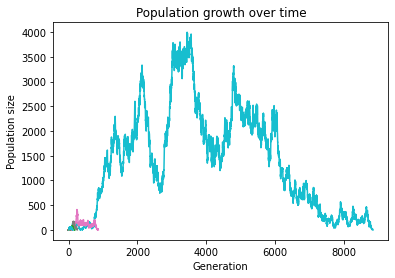

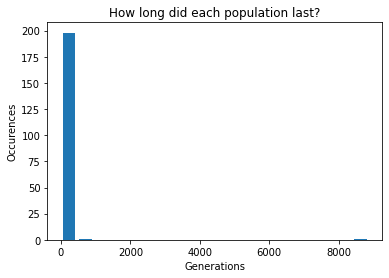

In [ ]:
#Editable parameter
iterations = 200
max_length = 10000 #Give up on the simulation if it takes too long

lengths = []

for _ in range(iterations):
  current_population = 1
  population = [current_population] #To graph the development, we'll keep track of the development of the population size

  while current_population > 0 and generation < max_length: #We simulate the population until it dies out, but we give up if it takes too long
    new_population = 0
    for i in range(current_population):
      p = np.random.choice([0, 2])
      new_population += p
    population.append(new_population)
    current_population = new_population
  lengths.append(len(population)) #We keep track of how long the population lasted
  plt.plot(population)
plt.title("Population growth over time")
plt.xlabel("Generation")
plt.ylabel("Population size")
plt.show()

plt.hist(lengths, bins = np.linspace(0, max(lengths) + 1, 20), rwidth = 0.8)
plt.title("How long did each population last?")
plt.xlabel("Generations")
plt.ylabel("Occurences")
plt.show()

If you toy around a bit with this program, you'll find that the amount of time that it takes for a population to die out is rather unpredictable. The reason for this is that we are effectively simulating a random walk, and while every random walk returns to its starting point with probability $1$, the expected amount of time for this to happen is $\infty$. That this is the case follows from a simple recursion argument: Let $E_n$ be the expected amount of time it takes for a standard random walk starting at $0$ to reach position $n$ for the first time. Then by conditioning on the first step, clearly $E_n = E_{n-1} / 2 + E_{n+1} / 2$. The only solutions to this equation are linear ones, but as $E_n \to \infty$ both as $n \to \infty$ and as $n \to -\infty$, the only solution is that $E_n = \infty$ for all $n$, including $n = 0$.

**Example 4.33.** Suppose that we're given a set of $n$ elements, which are to be arranged in some ordered list. At each unit of time, we select one of the elements from the list, say element $i$ with probability $p_i$, we record its current position in the list, and we then perform either of the following two actions:

*   The selected element is moved all the way to the front of the list (model A).
*   The selected element is moved one closer to the front of the list (model B).

With respect to either of these models, what is the long-run average position of the selected elements? Intuitively, it sounds reasonable that the average position will be closer to the front if we're following model A, but in fact the opposite will turn out to be true.

For now, everything that follows holds for either model. We start by noting that

$$\begin{split}
E(\text{position of requested element}) &= \sum_{i=1}^n p_i \cdot E(\text{position of $i$} \mid \text{$i$ is selected}) \\
&= \sum_{i=1}^n p_i \cdot E(\text{position of $i$}) \text{,}\end{split}$$

where the last step uses that the position of $i$ and the event of selecting $i$ are independent. Next, we note that

$$ \text{position of $i$} = 1 + \sum_{j \neq i} I_j \qquad \text{where} \qquad I_j = \begin{cases} 1 \qquad &\text{if $j$ precedes $i$,} \\ 0 \qquad &\text{otherwise.}\end{cases} $$

So we can infer that

$$E(\text{position of requested element}) = 1 + \sum_{i=1}^n p_i \cdot \sum_{j \neq i} P(\text{$j$ precedes $i$})\text{.}\tag{$*$}$$

In model A, the long-term probability that $j$ precedes $i$ is easy to find, as it can be rephrased as the probability that the last request for $j$ was more recent than the last request for $i$, which is $p_j / (p_i + p_j)$. We thus find that, in model A,

$$E(\text{position of requested element}) = 1 + \sum_{i=1}^n p_i \cdot \sum_{j \neq i} \frac{p_j}{p_i + p_j} \text{.}$$

Now let's turn to model $B$. We still have $(*)$, but it's not obvious anymore how these long-run probabilities are to be computed. Nonetheless there's still something we can say. Model B defines a time-reversible Markov chain whose limiting probabilities are related by 

$$p_{i_{j+1}} \pi(i_1,\ldots,i_j,i_{j+1},\ldots,i_n) = p_{i_j} \pi(i_1,\ldots,i_{j+1},i_j,\ldots,i_n)\text{.}$$

Using this rule inductively, we may deduce that

$$\pi(\ldots,i,k_1,\ldots,k_n,j,\ldots) = \bigg(\frac{p_i}{p_j}\bigg)^{n+1} \pi(\ldots,j,k_1,\ldots,k_n,i,\ldots)\text{.}$$

Now, when $p_j > p_i$, by summing over all states for which $i$ precedes $j$, we easily see that

$$P(\text{$i$ precedes $j$}) < \frac{p_i}{p_j} \,P(\text{$j$ precedes $i$})\text{.}$$

Since $P(\text{$i$ precedes $j$}) = 1 - P(\text{$j$ precedes $i$})$, this yields the inequality

$$P(\text{$j$ precedes $i$}) > \frac{p_j}{p_i + p_j}$$

whenever $p_j > p_i$, and so conversely, 

$$P(\text{$i$ precedes $j$}) < \frac{p_i}{p_i + p_j}$$

if $p_i > p_j$. This proves that the long-run average position of the selected elements is strictly smaller under model B.

Let's confirm this in a small example, consisting of four elements, with $p = (0.1, 0.2, 0.3, 0.4)$.

In [34]:
#Editable parameters
probabilities = [0.1, 0.2, 0.3, 0.4]
iterations = 10000

probabilities = [x / sum(probabilities) for x in probabilities] #Normalise probabilities if needed
cumulative = np.cumsum(probabilities)
elements = [i for i in range(len(probabilities))]

def choice(cumulative):
  """Make a random choice according to a cumulative list of probabilities."""
  p = np.random.rand()
  i = 0
  while cumulative[i] <= p:
    i += 1
  return i

#We begin with model A. We keep track of the position of the selected element as we go along.
selections = []
for _ in range(iterations):
  selected_index = elements.index(choice(cumulative)) #The randomness occurs within the choice() function.
  selections.append(selected_index + 1) #+1 because we don't want to count from 0
  elements.insert(0, elements.pop(selected_index))
print("Under model A, the average position of the selected element is", sum(selections) / iterations)

#Now we consider model B.
selections = []
for _ in range(iterations):
  selected_index = elements.index(choice(cumulative))
  selections.append(selected_index + 1)
  if selected_index == 0:
    pass
  else:
    elements.insert(selected_index - 1, elements.pop(selected_index))
print("Under model B, the average position of the selected element is", sum(selections) / iterations)

Under model A, the average position of the selected element is 2.3081
Under model B, the average position of the selected element is 2.2113


##Section 5

**Example 5.7 (Assignment problem).** A group of $n$ people is to be assigned to a set of $n$ jobs, with one person assigned to each job. For a given set of $n^2$ values $C_{ij}$, a cost $C_{ij}$ is incurred when person $i$ is assigned to job $j$. How do we determine the set of assignments that minimises the sum of the $n$ costs incurred? In this example we consider two heuristic algorithms for solving this problem. 

The first algorithm, which we call algorithm A, proceeds as follows. First assign person $1$ to the job resulting in the least cost. Then eliminate that job from consideration, and assign person $2$ to the job resulting in the least cost. Proceed inductively.

In contrast, algorithm B takes a more 'global' approach. It considers all $n^2$ cost values, and chooses the pair $(i_1,j_1)$ for which $C_{i,j}$ is minimal. It then assigns person $i_1$ to job $j_1$, eliminates all cost values involving either person $i_1$ or job $j_1$, and repeats the process.

Under the assumption that the $C_{ij}$ constitute a set of $n^2$ independent exponential random variables, each having mean $1$, which of the two algorithms results in a smaller expected cost?

*Solution:* Using the fact that the minimum of $k$ exponentially distributed variables of rate $\mu$ is itself exponentially distributed with rate $k\mu$, it's not hard to show that algorithm A has expected cost

$$E(A) = 1 + \frac{1}{2} + \cdots + \frac{1}{n}\text{.}$$

Now for algorithm B. The minimal cost $C_{(i_1,j_1)}$ is exponentially distributed of rate $n^2$. By memorylessness (!), $C_{(i_2,j_2)}$ is equal to $C_{(i_1,j_1)}$ plus an exponential of rate $(n - 1)^2$, and so on, so that 

$$\begin{split} 
E(B) &= E(C_{(i_1,j_1)} + E(C_{(i_2,j_2)}) + \cdots + E(C_{i_n,j_n}) \\
&= n \cdot \frac{1}{n^2} + (n-1) \cdot \frac{1}{(n-1)^2} + \cdots + 1 \cdot \frac{1}{1^2} \\
&= \frac{1}{n} + \frac{1}{n-1} + \cdots + 1\text{.}\end{split}$$

In other words, the outcomes of the two algorithms are the same! Let's confirm this by simulating the algorithm, arbitrarily picking $n$ to be $10$, making the math predict both algorithms to return an average cost of around $2.9$.

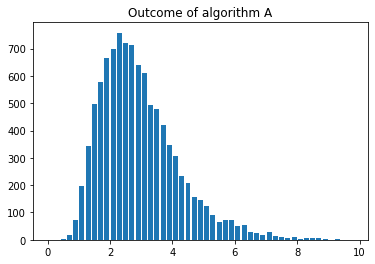

The average total cost from algorithm A is 2.9511260280599885


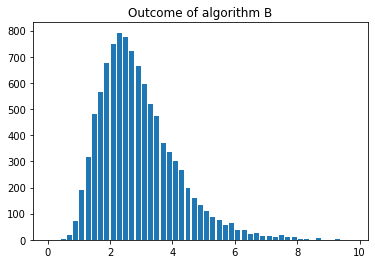

The average total cost from algorithm B is 2.918922558348867


In [ ]:
#Editable parameters
n = 10
iterations = 10000

def GreedyA(arr):
    total_cost = 0
    for _ in range(n ):
        job_choices = arr[0]
        cheapest = job_choices.argmin()
        total_cost += job_choices[cheapest]
        arr = np.delete(arr, 0, axis = 0)
        arr = np.delete(arr, cheapest, axis = 1)
    return total_cost

def GreedyB(arr):
    total_cost = 0
    for _ in range(n):
        x, y = np.unravel_index(arr.argmin(), arr.shape)
        total_cost += arr[x][y]
        arr = np.delete(arr, x, axis = 0)
        arr = np.delete(arr, y, axis = 1)
    return total_cost

values_A = []
values_B = []

for _ in range(iterations):
  costs = np.random.exponential(size = (n, n), scale = 1)
  outcomeA = GreedyA(costs)
  outcomeB = GreedyB(costs)
  values_A.append(outcomeA)
  values_B.append(outcomeB)

plt.hist(values_A, bins = np.arange(0, 10, 0.2), rwidth = 0.8)
plt.title("Outcome of algorithm A")
plt.show()

print("The average total cost from algorithm A is", sum(values_A) / iterations)

plt.hist(values_B, bins = np.arange(0, 10, 0.2), rwidth = 0.8)
plt.title("Outcome of algorithm B")
plt.show()

print("The average total cost from algorithm B is", sum(values_B) / iterations)

We remark that this problem is a classical combinatorial optimisation problem called the assignment problem, for which $O(n^3)$ running time algorithms are known to exist.

**Example 5.9.** There are $n$ cells in the human body, of which cells $1$ through $k$ are target cells. Associated with each cell is a weight $w_i$. The cells are destroyed one at a time in random order, the order being such that, if $S$ is the current set of surviving cells, then the next cell to be killed is to be cell $i$ with probability $w_i / \sum_{j \in S} w_j$. Let $A$ be the number of cells alive after cells $1,\ldots,k$ have been killed. What is $E(A)$?

*Solution:* Let $X_1,\ldots,X_n$ be auxiliary exponential variables with rates $w_1,\ldots,w_n$. Notice that $X_i < X_j$ with probability $w_i / (w_i + w_j)$; this makes the order of the $X_i$ a model for the order in which the cells are killed. If we now set the variable $A_j$ to be $1$ when $j$ is alive when cells $1,\ldots,k$ are killed, then 

$$A = \sum_{j = k+1}^n A_j\text{,}$$

and

$$\begin{split}
E(A_j) &= P\big(X_j > \max\{X_1,\ldots,X_k\}\big) \\
&= \int_0^\infty P\big(X_j > \max\{X_1,\ldots,X_k\} \mid X_j = x\big) w_j e^{-w_j x}\,dx \\
&= \int_0^\infty P\big(X_i < x \text{ for all }i = 1,\ldots,k\big) w_j e^{-w_j x}\,dx \\
&= \int_0^\infty \prod_{i=1}^k (1 - e^{-w_i x}) w_j e^{-w_j x}\,dx \\
&= \int_0^1 \prod_{i = 1}^k (1 - y^{w_i / w_j}) \,dy\text{.}
\end{split}$$

Thus, we obtain

$$E(A) = \sum_{j=k+1}^n E(A_j) = \sum_{j=k+1}^n \int_0^1 \prod_{i=1}^k (1 - y^{w_i / w_j})\,dy\text{.}$$

Let's verify this now, by taking $n = 10$, $k = 3$, and by arbitrarily letting the weights $w_i$ simply be $i$. Then some tedious integration work predicts that

$$E(A) = \frac{7}{90} + \frac{37}{693} + \frac{59}{1540} + \frac{293}{10296} + \frac{89}{4095} + \frac{17}{1001} + \frac{25}{1848} = \frac{683}{2730} \approx 0.25\text{.}$$

In view of the fact that many denominators of the summand are relatively prime, it is somewhat remarkable that the resulting fraction is so simple. In any case, let's verify this result numerically.

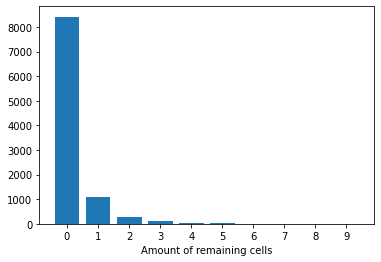

On average, the amount of remaining cells is 0.2431


In [ ]:
#Editable parameters
n = 10
k = 3
CELLS = [i for i in range(n)] #The cells run from 0 to n - 1 rather than from 1 to n.
TARGETS = [i for i in range(k)]
WEIGHTS = {i : i + 1 for i in range(n)}
rounds = 10000

counts = {i : 0 for i in range(n)} #Keep track of amount of remaining cells

for _ in range(rounds):
  #Initialise parameters
  cells = CELLS.copy()
  targets = TARGETS.copy()
  weights = WEIGHTS.copy()

  #Simulate the killing of a cell until the targets are killed
  while (cells != [] and cells[0] < k): #since the list of cells is ordered, we can check if cells 0, ..., k-1 are in the list simply by evaluating the 0-th element. 
    probabilities = [i / sum(weights.values()) for i in weights.values()] #normalised probabilities
    i = np.random.choice(cells, p = probabilities)
    cells.remove(i)
    del weights[i]

  #How many cells remain alive?
  A = len(cells)
  counts[A] += 1

output = list(counts.values())

plt.bar(range(n), output)
plt.xlabel("Amount of remaining cells")
plt.xticks(range(n))
plt.show()

total = sum(counts[i] * i for i in range(n))
print("On average, the amount of remaining cells is", total / rounds)

**Example 5.17 (Coupon collector's problem).** There are $m$ different types of coupons. Every time you get a coupon it is of type $i$ with probability $p_i$. What is the expected amount of time required to get all $m$ coupons?

*Solution:* Let's write $N_i$ for the number of coupons you need until you encounter one of type $i$. Then $N = \max_i N_i$. Although the $N_i$ are geometric with parameter $p_i$, they aren't independent. But we can relate the problem to one where we do have independence. Namely, we shall assume that coupons are collected at times according to a Poisson process with rate $1$. Say that an event of this process is of type $i$ if the coupon happens to be a coupon of type $i$. Now write $N_i(t)$ for the number of type-$i$ coupons collected by time $t$. Then these are *independent* Poisson processes of rates $p_i$. 

Let $X_i$ be the time of the first event of the $i$-th process. Denoting by $X = \max_i X_i$, the expected value $E(X)$ is the average amount of time it takes to obtain a complete set of coupons. To compute $E(X)$, we observe that

$$P(X < t) = P(X_i < t \text{ for all $i$}) = \prod_{i=1}^m (1 - e^{-p_it})\text{,}$$

and so

$$E(X) = \int_0^\infty P(X > t) \,dt\text{,}\tag{$*$}$$

which we can evaluate. But how is $E(X)$, the expected amount of time to obtain a complete set, related to $E(N)$, the expected number of coupons it takes? Well, if we denote by $T_i$ the interarrival time between the $(i-1)$-th coupon and the $i$-th coupon, then $X = \sum_{i=1}^N T_i$, virtually by definition. But the $T_i$ are independent exponentials of rate $1$, and $N$ is independent of the $T_i$, and so 

$$E(X \mid N) = N \,E(T_i) = N\text{,}$$

from which we see that $E(X) = E(N)$. As the left-hand side can be evaluated using $(*)$, so can $E(N)$, and we're done. 

Let's now consider an explicit example, involving $50$ coupons of varying prevalence.

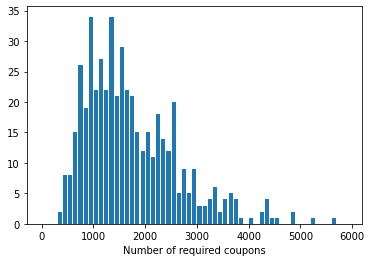

In [ ]:
#Editable parameter
probabilities = [1] * 5 + [5] * 10 + [20] * 35

m = len(probabilities) #Infer number of coupons
probabilities = [p / sum(probabilities) for p in probabilities] #Normalise probabilities

output = []

for _ in range(500):
  drawn_coupons = [0] * m

  while 0 in drawn_coupons:
    coupon = np.random.choice(range(m), p = probabilities)
    drawn_coupons[coupon] += 1
  
  total = sum(drawn_coupons)
  output.append(total)

plt.hist(output, bins = np.arange(0, 6000, 100), rwidth = 0.8)
plt.xlabel("Number of required coupons")
plt.show()

In the special case that the probabilities of all coupons are the same, this problem is known as the coupon collector's problem; in this case, the expected number of coupons one needs to buy grows as $\Theta(n \log n)$.

**Example 5.18, 5.25 ($M / G / \infty$ queue).** Customers arrive at a service station in accordance with a Poisson process of rate $\lambda$. Upon arrival, the customer is served by one of an infinite number of possible servers; the service times are independent, with cumulative distribution $G$. Let $X(t)$ be the number of customers that have completed service by time $t$, and $Y(t)$ be the number of customers being served at time $t$. What are their distributions?

The distribution of $X(t)$, we claim, is Poisson distributed with mean $\lambda \int_0^t G(y)\,dy$. Likewise, $Y(t)$ is Poisson distributed with mean $\lambda \int_0^t 1 - G(y)\,dy$. In particular, this makes both statistics into a nonhomogeneous Poisson process. The proof is rather formal, so I'll omit it.

Let's confirm it numerically in the special case of an $M/M/\infty$ queue, in which the service time distribution $G$ is also assumed to be exponential, say of rate $\mu$. Then a direct calculation shows that $Y(t)$ has mean 

$$\frac{\lambda}{\mu} \big(1 - e^{-\mu t}\big)\text{.}$$

To simulate the queue, we choose to discretise the time into small steps, and we use the fact that Poisson processes can be approximated arbitrarily well by uniformly sampling at each time step. As soon as a customer arrives, we compute his service time; for this, no discretisation is needed, as we can simply sample the time from an exponential distribution. In fact, no discretisation is needed at all for this simulation, but it becomes the more versatile option once our processes become more advanced.

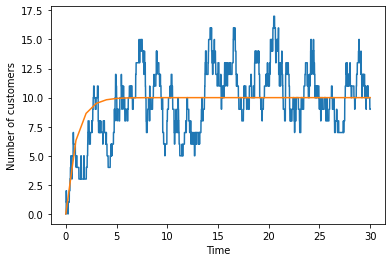

In [19]:
#Editable parameters
time_step = 1 / 1000 #Smaller time steps means more accurate approximation
end_time = 30
arrival_rate = 10
service_rate = 1

queue = [] #Keeps track of the queue at a given time
data = [] #Keeps track of the length of the queue over time
time = 0 #Keeps track of the time
while time < end_time:
  time += time_step

  #We model the random arrival of customers
  p = np.random.rand()
  if p < time_step * arrival_rate:
    service_time = np.random.exponential(scale = service_rate)
    leave_time = time + service_time
    queue.append(leave_time) #A customer will be specified by the time he leaves the store
  customers = len(queue)
  data.append(customers)

  #A customer leaves the store if his value is surpassed by the current time
  queue = [customer for customer in queue if customer > time] 

plt.plot(np.linspace(0, end_time, len(data)), data)

def mean(t):
  return arrival_rate * (1 - math.exp(-service_rate * t)) / service_rate

plt.plot([mean(t) for t in range(end_time + 1)])
plt.xlabel("Time")
plt.ylabel("Number of customers")
plt.show()

##Section 6

**Example 6.5 ($M / M / 1$ queue).** Customers arrive at a single-server service stations in accordance with a Poisson process having rate $\lambda$. Upon arrival, each customer goes directly into service if the server is free; if not, he joins the queue. When the server finishes serving a customer, the customer leaves the system, and the next customer in line enters the service. The successive service times are also a Poisson process, of rate $\mu$. 

**Example 6.6 ($M / M / s$ queue).**

**Example 6.13.** A job shop consists of $M$ machines and a serviceman. The amount of time that each machine runs before breaking down is exponentially distributed with rate $\lambda$. Suppose that the amount of time it takes to fix a machine is exponentially distributed with rate $\mu$. What is the average number of machines (not) in use? What is the proportion of time they are in use?

##Section 7

**Example 7.13.** Customers arrive at a train depot in accordance with a renewal process, say with rate of arrivals equal to $10$. Whenever there are $N$ customers waiting in the depot, a train leaves. Any such departure costs $100$ dollars. However, the depot moreover incurs a continual cost at a rate of $n$ dollars per unit time whenever there are $n$ customers waiting. How do we choose $N$ so as to minimise the average cost incurred per train departure?

Certainly a very low $N$ will be problematic, as it will lead to too many costly departures, but a very high $N$ also becomes expensive, as the average cost increases once more people are waiting. So we expect to find a certain optimum. Where can we find this optimum?

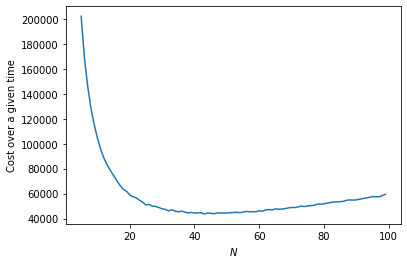

In [ ]:
#Editable parameters
rate = 10
continual_costs = 1
departure_cost = 100
min_N = 5 #Minimum N to try out
max_N = 100 #Maximum N to try out

max_time = 1000 #We let the simulation run for this amount of units time

data = [] #Keep track of the costs for varying N

for N in range(min_N, max_N):
  time = 0
  cost = 0
  passengers = 0
  while time < max_time:
    #As the process is Poisson, the mean interarrival time is exponentially distributed
    interarrival_time = np.random.exponential(scale = 1 / rate)
    cost += continual_costs * passengers * interarrival_time
    time += interarrival_time
    passengers += 1
    if passengers == N:
      passengers = 0
      cost += departure_cost
  data.append(cost)

plt.plot(range(min_N, max_N), data)
plt.xlabel(r"$N$")
plt.ylabel("Cost over a given time")
plt.show()

As expected, we observe an optimum for intermediate $N$, which appears to roughly lie between $40$ and $50$. Can we confirm this mathematically? Let's say that a 'cycle' is completed whenever a train leaves. Denote by $t_i$ the time between the $i$-th arrival and the $(i+1)$-th arrival in some cycle. Then

$$E(\text{cost of a cycle}) = E\big(t_1 + 2t_2 + \cdots + (N-1) t_{N-1}\big)\text{.}$$

The $t_i$ are exponentially distributed, with expected value $1/10$, and so we find the expected cost of a cycle to evaluate to $N(N - 1) / 20$.

On average, the length of a cycle in $N / 10$. How many cycles do we then expect to see in $T = 1000$ units time? The answer is $1000 / (N / 10)$ of course. But associated to the end of each cycle is moreover a constant cost of $100$, corresponding to the departure of the train. We thus find that

$$\begin{split}
E(\text{cost in $1000$ units time}) &= \frac{10000}{N} \cdot \bigg(\frac{N(N-1)}{20} + 100\bigg) \\
&= 500(N-1) + \frac{1\,000\,000}{N} \text{.}
\end{split}$$

This function has admits a global minimum at $N = 20 \sqrt{5}$, which evaluates to around $45$ --- a value consistent with our observations. Let's graph this function to make sure our predictions are correct.

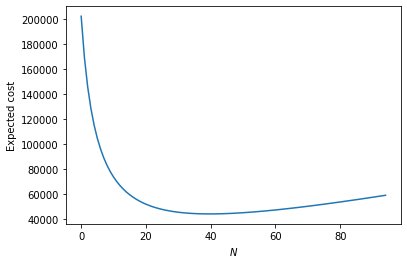

In [ ]:
min_N = 5 
max_N = 100 

def E(N):
  return 500 * (N - 1) + 1000000 / N

plt.plot([E(i) for i in range(min_N, max_N)])
plt.xlabel(r"$N$")
plt.ylabel(r"Expected cost")
plt.show()

**Example 7.25.**

##Section 8

**Example 8.3 (Inspection paradox).**

**Section 8.3.3.**

**Section 8.3.4.**

**Section 8.5.2 (Pollaczek--Khintchine formula).**

**Section 8.9.4 ($M/G/k$ queue).**